**Enable autoreload extension**

In [1]:
%load_ext autoreload
%autoreload 2

**Setup dependencies**

In [2]:
!git clone https://github.com/huawei-noah/SMARTS 2> /dev/null

In [3]:
!cd SMARTS && ls && git checkout ipynb-test-deps && pip install .[camera-obs]

baselines	 OPEN_SOURCE_SOFTWARE_NOTICE
bin		 pyproject.toml
CHANGELOG.md	 README.md
cli		 requirements.txt
CONTRIBUTING.md  scenarios
docs		 setup.py
envision	 smarts
examples	 tests
LICENSE		 THIRD_PARTY_OPEN_SOURCE_SOFTWARE_NOTICE
Makefile	 ultra
MANIFEST.in	 utils
NOTICE		 zoo
Branch 'ipynb-test-deps' set up to track remote branch 'ipynb-test-deps' from 'origin'.
Switched to a new branch 'ipynb-test-deps'
Processing /content/SMARTS
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████|

In [4]:
import sys
sys.path.insert(0, "./SMARTS/examples/env")
sys.path.insert(0, "./SMARTS/zoo")
import baseline
import policies.keep_lane_agent

/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] for x in supported_dtypes]
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/lib/python3.7/dist-packages/scipy/special/orthogonal.py:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silen

**Import Base Modules**

In [5]:
import gym

from smarts.zoo import registry
from smarts.env.wrappers.episode_logger import EpisodeLogger
from smarts.env.wrappers.record import RecordVideo

**Run an episode**

/usr/local/lib/python3.7/dist-packages/html5lib/_trie/_base.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


╭────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────╮
│            Episode │     Sim T / Wall T │        Total Steps │        Steps / Sec │       Scenario Map │    Scenario Routes │     Mission (Hash) │             Scores │
├────────────────────┼────────────────────┼────────────────────┼────────────────────┼────────────────────┼────────────────────┼────────────────────┼────────────────────┤


/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kwargs['lwork'] = ret[-2][0].real.astype(numpy.int)


│                0/? │               5.44 │                149 │              54.44 │       figure_eight │                    │ -37106691724444781 │ 221.58 - SingleAgent │
│                1/? │               5.66 │                149 │              56.58 │       figure_eight │                    │ -37106691724444781 │ 200.50 - SingleAgent │
│                2/? │               7.71 │                149 │              77.10 │       figure_eight │                    │ -37106691724444781 │ 220.82 - SingleAgent │
╰────────────────────┴────────────────────┴────────────────────┴────────────────────┴────────────────────┴────────────────────┴────────────────────┴────────────────────╯


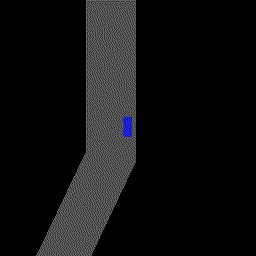

In [6]:
from smarts.core.utils.episodes import episode_range

#FormatObs should already be applied
env = gym.make("figure_eight-v0")
# gym.wrappers.Monitor
env: gym.Env = RecordVideo(env, frequency=10, name="007-render")
env: gym.Env = EpisodeLogger(env)

agent = registry.make_agent("zoo.policies:keep-lane-agent-v0")
for episode in episode_range(max_steps=450):
    observation = env.reset()
    reward, done, info = None, False, None
    while episode.register_step(observation, reward, done, info):
        action = agent.act(observation)
        observation, reward, done, info = env.step(action)

env.close()